# Clustering
With using clustering we want to check if the different types of fish is living in different places using the cordinates, and if this is one of the huge impacts on the other ML models we are using

In [64]:
import import_ipynb
from preprocess import df
df.head()

,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month,cluster
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12,4
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12,4
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12,4
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12,4
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1,2


In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Selecting features
features = ['Startposisjon bredde', 'Startposisjon lengde']
X = df[features]

# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Note to self: In clustering, we typically don't split the data into training and testing sets in the same way as classification

In [59]:
# KMeans clustering model
# Assuming the number of clusters to be 5 as I want 5 clusters 

# !! No need for PCA since we only be using 2 dimmensions
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=50, random_state=42)
kmeans.fit(X_scaled)

# In clustering, we don't make predictions in the same way as in classification. Instead, we assign each data point to a cluster.
labels = kmeans.labels_

Silhouette Score: 0.5774915795808658


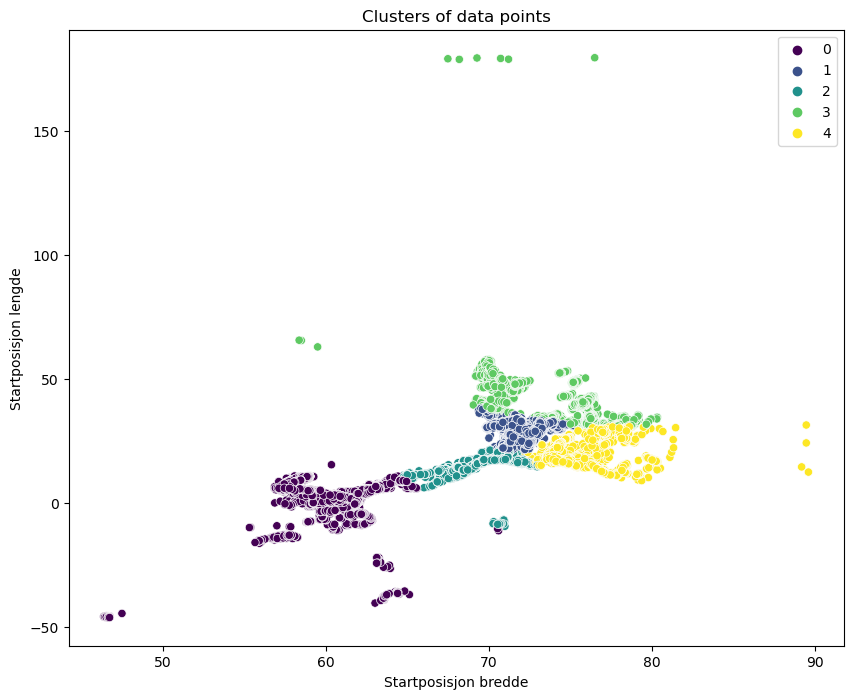

In [60]:
# Evaluating the model
# One common way to evaluate clustering models is by using the silhouette score, which measures how similar an object is to its own cluster compared to other clusters.
silhouette_avg = silhouette_score(X_scaled, labels)
print("Silhouette Score:", silhouette_avg)

# Distribution of your data points across the clusters:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing the clusters
# With use of StartPosisjon bredde and Startposisjon lengde its easy to visualize the clusters bassed on where the fish get "fished"
plt.figure(figsize=(10, 8))
sns.scatterplot(data=X, x='Startposisjon bredde', y='Startposisjon lengde', hue=labels, palette='viridis')
plt.title('Clusters of data points')
plt.show()

# Vizualtion 
In the vizualtion we can see its splitting the cordinates to 5 good clusters, which they are all in different segments of the area.

# No need Elbow method to find the optimal amount of clusters as I want it to be 5, but here is an example how to do it

c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\47476\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

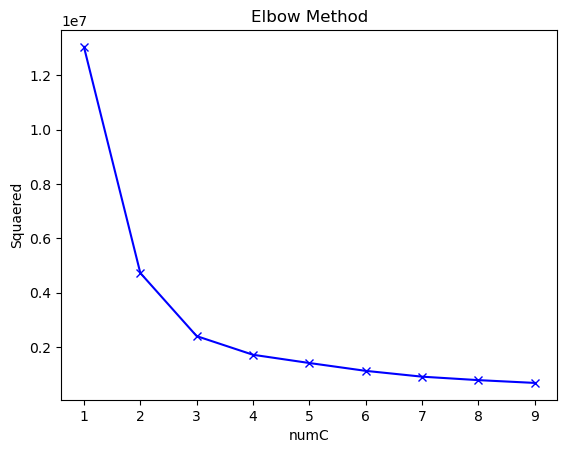

In [66]:

squared_distances = []
numC = range(1,10)
for num_clusters in numC:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    squared_distances.append(kmeans.inertia_)

plt.plot(numC, squared_distances, 'bx-')
plt.xlabel('numC') 
plt.ylabel('Squaered') 
plt.title('Elbow Method')
plt.show()

By looking at where it bends we find the optimal numbers of clusters. Which in this case is 2. This is because the data on the fishing start here is hard to split up, because alot of it is to alike

In [62]:
# Putting the cluster data in to the dataframe
y_predict = kmeans.fit_predict(X_scaled)
print(y_predict)
df['cluster'] = y_predict
df.head()

[4 4 4 ... 4 4 4]


,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month,cluster
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12,4
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12,4
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12,4
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12,4
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1,2


In [63]:
# Counting how many classes are in each cluster
counts = df.groupby(['Hovedart FAO', 'cluster']).size().reset_index(name='count')

print(counts)


    Hovedart FAO  cluster  count
0              0        0   1613
1              0        1   8845
2              0        2   6269
3              0        3   1109
4              0        4   7169
5              1        0   9090
6              1        1   4966
7              1        2   4509
8              1        3      2
9              1        4      7
10             2        0   6744
11             2        1    595
12             2        2     87
13             2        3   5659
14             2        4    448
15             3        0    470
16             3        1   2384
17             3        2   2666
18             3        3    410
19             3        4   1847
20             4        0   2175
21             4        2    239


# Conclusion
Freindly reminder that 'Torsk':  0, 'Sei':  1, 'Dypvannsreke': 2, 'Hyse': 3, 'Lange': 4

Because the grupping of the clusters are "randomly" group by the cordinates, we expect to see some outliers in the cluster, but it helps us get a clearer look at where approximately the fish gets fished.

As anticipated, we observe a clear correlation among fish species such as "torsk," "sei," and "hyse," all belonging to the cod family, primarily being caught in locations 1 and 2. An exception to this pattern is "sei," which is also occasionally caught in location 0. Conversely, fish species not in the cod family, like "Dyppvannsreke," tend to be caught predominantly in clusters 3 and 0. Additionally, "Lange" is primarily caught in cluster 0. This observation suggests that similar fish species is a greater challenge for classification compared to dissimilar ones. As we can cleary see in the confussion matrix of the KNN model.

# GaussionMixture Clustering method, with PCA

In [54]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import pandas as pd

In [55]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)
X_pca = pd.DataFrame(X_pca)
X_pca.columns = ['P1', 'P2'] 

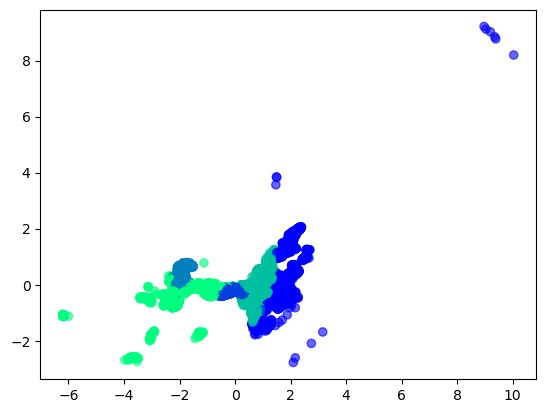

In [56]:
plt.scatter(X_pca['P1'], X_pca['P2'],  
           c = GaussianMixture(n_components = 5).fit_predict(X_pca), cmap =plt.cm.winter, alpha = 0.6) 
plt.show()

In [57]:
gmm = GaussianMixture(n_components=5)
y_predict = gmm.fit_predict(X_scaled)
print(y_predict)
df['cluster'] = y_predict
df.head()

[3 3 3 ... 3 2 2]


,Startposisjon bredde,Startposisjon lengde,Havdybde start,Varighet,Stopposisjon bredde,Stopposisjon lengde,Havdybde stopp,Trekkavstand,Redskap FDIR (kode),Hovedart FAO,Art - FDIR,Rundvekt,Bredde,Fartøylengde,Month,cluster
1,74.885,16.048,-335.0,295.0,74.914,15.969,-334.0,3970.0,51.0,3,Hyse,9594.0,12.60,56.8,12,3
5,74.910,15.868,-403.0,267.0,74.901,16.248,-277.0,11096.0,51.0,3,Hyse,9118.0,12.60,56.8,12,3
11,74.883,16.056,-346.0,315.0,74.924,15.742,-496.0,10215.0,51.0,3,Hyse,12432.0,12.60,56.8,12,3
17,74.931,15.785,-443.0,243.0,74.926,15.894,-358.0,3214.0,51.0,0,Torsk,7022.0,12.60,56.8,12,3
19,67.828,12.972,-71.0,63.0,67.827,12.942,-56.0,1269.0,61.0,3,Hyse,4.0,5.06,19.1,1,4


In [58]:
counts = df.groupby(['Hovedart FAO', 'cluster']).size().reset_index(name='count')

print(counts)

    Hovedart FAO  cluster  count
0              0        0   6613
1              0        1   1649
2              0        2   5577
3              0        3   5281
4              0        4   5885
5              1        0   5674
6              1        1   9301
7              1        2     83
8              1        3      2
9              1        4   3514
10             2        0    585
11             2        1   6754
12             2        2   6128
13             2        3      2
14             2        4     64
15             3        0   3518
16             3        1    505
17             3        2   1055
18             3        3   1512
19             3        4   1187
20             4        0      2
21             4        1   2225
22             4        4    187
